# Notebook Summary

The aim of this notebook is to find the best predictive model given the data. We do this by setting up a validation schema and evaluate different models and hyperparameters based on their out of fold errors. The hyperparameter search is performed with Optuna(https://optuna.org/) which utilizez bayesian optimization.

We use a walkforward validation schema in order to prevent data leakage. The image below shows an example of such schema where blue indicates training data and red indicates validation data. In our case we'll use the following folds:

- Fold 1: Train: [2010-2016], Validation: 2017
- Fold 2: Train: [2010-2017], Validation: 2018
- Fold 3: Train: [2010-2018], Validation: 2019

Once we have found the hyperparameters with the lowest out of fold error we'll train on 2010-2019 and finally submit predictions for 2020. The error metric we'll use is the root mean squared error.

<img src="validation.png" width="600">

# Import Packages and Modules

In [1]:
import joblib
import optuna
import sys
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append("..")
from src.validate_model import rmse, SARIMA, Pipeline, save_model

# Load Data

In [2]:
train = pd.read_pickle("../data/processed/train.pkl")
test = pd.read_pickle("../data/processed/test.pkl")

# Hyperparameter Optimization 

In [3]:
#create pipeline instance
pl = Pipeline(train, test)

In [4]:
#perform hyperparameter search
pl.optimize_hyperparams(20)

[I 2020-10-27 11:34:36,575] A new study created in memory with name: no-name-a9951bac-05fd-4daa-a7a4-d5c423660789


Fold 0 loss: 11937.664939324499
Fold 1 loss: 9378.265705017055


[I 2020-10-27 11:34:38,832] Trial 0 finished with value: 9741.191287219333 and parameters: {'p': 2, 'd': 1, 'q': 0, 'P': 1, 'D': 1, 'Q': 1}. Best is trial 0 with value: 9741.191287219333.


Fold 2 loss: 7907.643217316443
Fold 0 loss: 11587.383236307547
Fold 1 loss: 8138.892456089883


[I 2020-10-27 11:34:43,266] Trial 1 finished with value: 9366.071077990788 and parameters: {'p': 2, 'd': 1, 'q': 1, 'P': 2, 'D': 1, 'Q': 0}. Best is trial 1 with value: 9366.071077990788.


Fold 2 loss: 8371.937541574935
Fold 0 loss: 11557.405014919168
Fold 1 loss: 9586.392300899965


[I 2020-10-27 11:34:44,043] Trial 2 finished with value: 10134.601094205414 and parameters: {'p': 0, 'd': 1, 'q': 2, 'P': 1, 'D': 1, 'Q': 0}. Best is trial 1 with value: 9366.071077990788.


Fold 2 loss: 9260.005966797109
Fold 0 loss: 4715.4685965998815
Fold 1 loss: 6780.4959679110125


[I 2020-10-27 11:34:44,322] Trial 3 finished with value: 5640.904700692085 and parameters: {'p': 0, 'd': 1, 'q': 0, 'P': 0, 'D': 2, 'Q': 0}. Best is trial 3 with value: 5640.904700692085.


Fold 2 loss: 5426.749537565362
Fold 0 loss: 4684.809367999568
Fold 1 loss: 6397.1321165953095


[I 2020-10-27 11:34:48,998] Trial 4 finished with value: 4589.505891790481 and parameters: {'p': 2, 'd': 1, 'q': 1, 'P': 1, 'D': 2, 'Q': 0}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 2686.5761907765655
Fold 0 loss: 52287.46551160678
Fold 1 loss: 41201.94965297208


[I 2020-10-27 11:34:51,104] Trial 5 finished with value: 38182.4889785124 and parameters: {'p': 1, 'd': 2, 'q': 0, 'P': 0, 'D': 1, 'Q': 2}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 21058.051770958362
Fold 0 loss: 5802.666138224155
Fold 1 loss: 19362.901978599195


[I 2020-10-27 11:34:59,509] Trial 6 finished with value: 10553.521943557815 and parameters: {'p': 1, 'd': 2, 'q': 2, 'P': 0, 'D': 1, 'Q': 2}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 6494.997713850095
Fold 0 loss: 11169.05686120556
Fold 1 loss: 13015.044957498356


[I 2020-10-27 11:35:07,157] Trial 7 finished with value: 11925.485847520426 and parameters: {'p': 1, 'd': 1, 'q': 0, 'P': 1, 'D': 2, 'Q': 1}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 11592.355723857361
Fold 0 loss: 10186.685728834298
Fold 1 loss: 16231.646247211936


[I 2020-10-27 11:35:17,861] Trial 8 finished with value: 12182.298277481868 and parameters: {'p': 1, 'd': 1, 'q': 1, 'P': 2, 'D': 2, 'Q': 1}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 10128.562856399367
Fold 0 loss: 22399.081833524833
Fold 1 loss: 5995.039957020974


[I 2020-10-27 11:35:21,588] Trial 9 finished with value: 14266.290580906734 and parameters: {'p': 1, 'd': 2, 'q': 2, 'P': 0, 'D': 2, 'Q': 0}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 14404.749952174398
Fold 0 loss: 7696.378634557184
Fold 1 loss: 15594.289869116215


[I 2020-10-27 11:35:30,399] Trial 10 finished with value: 8501.131378178696 and parameters: {'p': 2, 'd': 2, 'q': 1, 'P': 2, 'D': 2, 'Q': 0}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 2212.7256308626897
Fold 0 loss: 4131.826676585662
Fold 1 loss: 6436.404090316624


[I 2020-10-27 11:35:33,447] Trial 11 finished with value: 4768.775561996761 and parameters: {'p': 0, 'd': 1, 'q': 1, 'P': 1, 'D': 2, 'Q': 0}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 3738.0959190879976
Fold 0 loss: 4131.826676585662
Fold 1 loss: 6436.404090316624


[I 2020-10-27 11:35:36,462] Trial 12 finished with value: 4768.775561996761 and parameters: {'p': 0, 'd': 1, 'q': 1, 'P': 1, 'D': 2, 'Q': 0}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 3738.0959190879976
Fold 0 loss: 12623.482246036749
Fold 1 loss: 6489.491173518759


[I 2020-10-27 11:35:40,954] Trial 13 finished with value: 8677.082652422432 and parameters: {'p': 0, 'd': 1, 'q': 1, 'P': 1, 'D': 2, 'Q': 1}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 6918.274537711785
Fold 0 loss: 4684.809367999568
Fold 1 loss: 6397.1321165953095


[I 2020-10-27 11:35:45,746] Trial 14 finished with value: 4589.505891790481 and parameters: {'p': 2, 'd': 1, 'q': 1, 'P': 1, 'D': 2, 'Q': 0}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 2686.5761907765655
Fold 0 loss: 18596.027728275083
Fold 1 loss: 33988.02623201826


[I 2020-10-27 11:36:06,148] Trial 15 finished with value: 20321.5324977629 and parameters: {'p': 2, 'd': 1, 'q': 2, 'P': 2, 'D': 2, 'Q': 1}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 8380.543532995356
Fold 0 loss: 4684.809367999568
Fold 1 loss: 6397.1321165953095


[I 2020-10-27 11:36:12,820] Trial 16 finished with value: 4589.505891790481 and parameters: {'p': 2, 'd': 1, 'q': 1, 'P': 1, 'D': 2, 'Q': 0}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 2686.5761907765655
Fold 0 loss: 4684.809367999568
Fold 1 loss: 6397.1321165953095


[I 2020-10-27 11:36:19,008] Trial 17 finished with value: 4589.505891790481 and parameters: {'p': 2, 'd': 1, 'q': 1, 'P': 1, 'D': 2, 'Q': 0}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 2686.5761907765655
Fold 0 loss: 9741.630384996979
Fold 1 loss: 11522.04724912397


[I 2020-10-27 11:36:25,614] Trial 18 finished with value: 9996.667255437571 and parameters: {'p': 2, 'd': 1, 'q': 0, 'P': 0, 'D': 2, 'Q': 1}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 8726.324132191763
Fold 0 loss: 4286.554373758245
Fold 1 loss: 13217.265985603282


[I 2020-10-27 11:36:51,701] Trial 19 finished with value: 6731.273079580031 and parameters: {'p': 2, 'd': 2, 'q': 2, 'P': 2, 'D': 2, 'Q': 2}. Best is trial 4 with value: 4589.505891790481.


Fold 2 loss: 2689.9988793785633


# Inspect Results

In [7]:
pl.study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_D,params_P,params_Q,params_d,params_p,params_q,state
0,0,9741.191287,2020-10-27 11:34:36.577983,2020-10-27 11:34:38.832066,0 days 00:00:02.254083,1,1,1,1,2,0,COMPLETE
1,1,9366.071078,2020-10-27 11:34:38.833092,2020-10-27 11:34:43.265817,0 days 00:00:04.432725,1,2,0,1,2,1,COMPLETE
2,2,10134.601094,2020-10-27 11:34:43.266897,2020-10-27 11:34:44.042857,0 days 00:00:00.775960,1,1,0,1,0,2,COMPLETE
3,3,5640.904701,2020-10-27 11:34:44.043889,2020-10-27 11:34:44.322423,0 days 00:00:00.278534,2,0,0,1,0,0,COMPLETE
4,4,4589.505892,2020-10-27 11:34:44.323518,2020-10-27 11:34:48.998554,0 days 00:00:04.675036,2,1,0,1,2,1,COMPLETE
5,5,38182.488979,2020-10-27 11:34:48.999540,2020-10-27 11:34:51.104142,0 days 00:00:02.104602,1,0,2,2,1,0,COMPLETE
6,6,10553.521944,2020-10-27 11:34:51.105126,2020-10-27 11:34:59.508898,0 days 00:00:08.403772,1,0,2,2,1,2,COMPLETE
7,7,11925.485848,2020-10-27 11:34:59.509884,2020-10-27 11:35:07.156890,0 days 00:00:07.647006,2,1,1,1,1,0,COMPLETE
8,8,12182.298277,2020-10-27 11:35:07.157882,2020-10-27 11:35:17.860847,0 days 00:00:10.702965,2,2,1,1,1,1,COMPLETE
9,9,14266.290581,2020-10-27 11:35:17.862154,2020-10-27 11:35:21.588492,0 days 00:00:03.726338,2,0,0,2,1,2,COMPLETE


# Best Hyperparameters

In [17]:
print(f"Lowest RMSE:  {pl.study.best_trial.value}")

Lowest RMSE:  4589.505891790481


In [20]:
print(f"Best hyperparameters {pl.study.best_trial.params}")

Best hyperparameters {'p': 2, 'd': 1, 'q': 1, 'P': 1, 'D': 2, 'Q': 0}


# Retrain and Predict

In [3]:
#set best hyperparams
params = {"order": (2, 1, 1), "seasonal_order": (1, 2, 0, 24), "trend": "c", "freq": "MS"}
#train model on full training set
model = SARIMA(train, **params)
model.train()
#make predictions for 2020
preds = model.pred(steps = 12)
preds

2020-01-01    913406.986707
2020-02-01    931073.446764
2020-03-01    946843.858653
2020-04-01    958013.946051
2020-05-01    941466.080731
2020-06-01    918165.079706
2020-07-01    897016.434529
2020-08-01    895454.087042
2020-09-01    907261.361472
2020-10-01    909086.914593
2020-11-01    905731.074563
2020-12-01    893946.145016
Freq: MS, Name: predicted_mean, dtype: float64

# Save Model

In [4]:
save_model(model, "../models/sarima.pkl")

# Plot Predictions

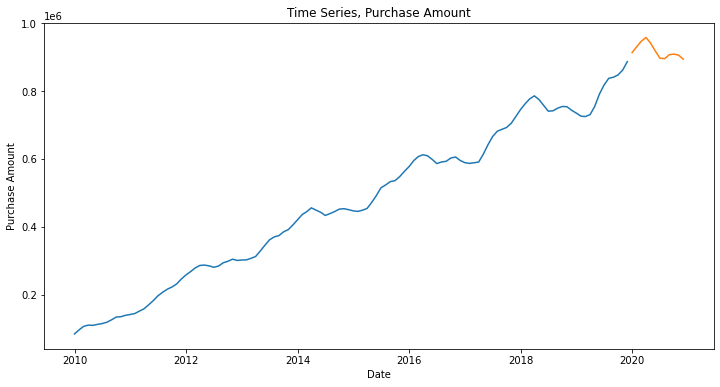

In [7]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(train)
ax.plot(preds)
ax.set_title("Time Series, Purchase Amount")
ax.set_xlabel("Date")
ax.set_ylabel("Purchase Amount")
plt.show()

# Save Predictions

In [8]:
#store predictions for test data and merge with training data
test["purchase_amount"] = preds
df = pd.concat([train, test], axis = 0).reset_index()

In [9]:
df.to_csv("../data/processed/predictions.csv", index = False)